In [1]:
import pandas as pd

# Класс для сохранения данных

In [2]:
class MyData:
    def __init__(self, data: pd.DataFrame):                  
        self.data = data

    def save_csv(self, path: str):
        self.data.to_csv(path, index= False)

    def save_excel(self, path: str):
        self.data.to_excel(path, index=False)
    
    def save_pickle(self, path: str):
        self.data.to_pickle(path)

    def save_sql (self, database:str ="database", tab_name: str = "default_tab"):
        import sqlite3
        conn = sqlite3.connect(database)
        self.data.to_sql(tab_name, conn, if_exists= 'replace', index = False)

In [3]:
df = pd.read_pickle("df_nashdomrf.pkl")

In [4]:
my_data = MyData(df)

In [5]:
my_data.save_csv("test.csv")

In [6]:
my_data.save_excel("test.xlsx")

In [7]:
my_data.save_pickle("test.pkl")

In [8]:
my_data.data = my_data.data.astype(str)

In [9]:
my_data.save_sql()

# Класс для визуализации данных

In [10]:
df = pd.read_pickle("df_nashdomrf.pkl")

In [11]:
df = df.rename(columns={
    "nameObj": "Название объекта",
    "objPriceAvg": "Средняя цена, кв.м",
    "address": "Адрес",
    "region": "Регион",
    "objReady100PercDt": "Срок сдачи",
    "objElemLivingCnt": "Кол-во квартир",
    "floorMax": "Максимум этажей",
    "floorMin": "Минимум этажей",
    "objLkFinishTypeDesc": "Отделка",
    "objElevatorPassengerCnt": "Грузоподъемность лифтов",
    "objElemParkingCnt": "Наличие парковки",
    "objInfrstrBicycleLaneFlg": "Наличие велодорожки",
    "objInfrstrPlaygrndCnt": "Наличие детской площадки",
    "objInfrstrSportGroundCnt": "Наличие спортивной площадки",
    "developer.devFullCleanNm": "Застройщик",
    "developer.devEmail": "Почта застройщика",
    "developer.devPhoneNum": "Телефон застройщика"
})

In [12]:
df = df[["id", "Телефон застройщика", "Почта застройщика",
         "Застройщик","Наличие спортивной площадки","Наличие детской площадки", 
         "Наличие парковки", "Наличие велодорожки","Грузоподъемность лифтов","Отделка",
         "Название объекта","Адрес","Регион", "Срок сдачи", "Средняя цена, кв.м",
         "Кол-во квартир", "Максимум этажей",  "Минимум этажей"]]

In [13]:
class DataVisualizer:
    def __init__(self, data: pd.DataFrame):                  
        self.data = data


    def volume_housing_region(self):
        houses = self.data.groupby(by="Регион")["id"].count().sort_values(ascending=True)
        houses.plot.barh(figsize=(10, 25))


    def volume_year_plot(self):
        self.data['Год сдачи'] = pd.to_datetime(self.data['Срок сдачи']).dt.strftime('%Y') 
        reg_year_df = self.data.groupby(['Регион', 'Год сдачи'])[['id']].count().reset_index()
        year_df = reg_year_df.groupby('Год сдачи')['id'].count().sort_index(ascending=True)
        year_df.plot()

    def mean_max_floors(self):
        mean_max_fl = self.data.groupby('Регион')['Максимум этажей'].mean().sort_values(ascending=True)
        mean_max_fl.plot.bar(figsize=(15, 5))

In [14]:
data_vis = DataVisualizer(df)

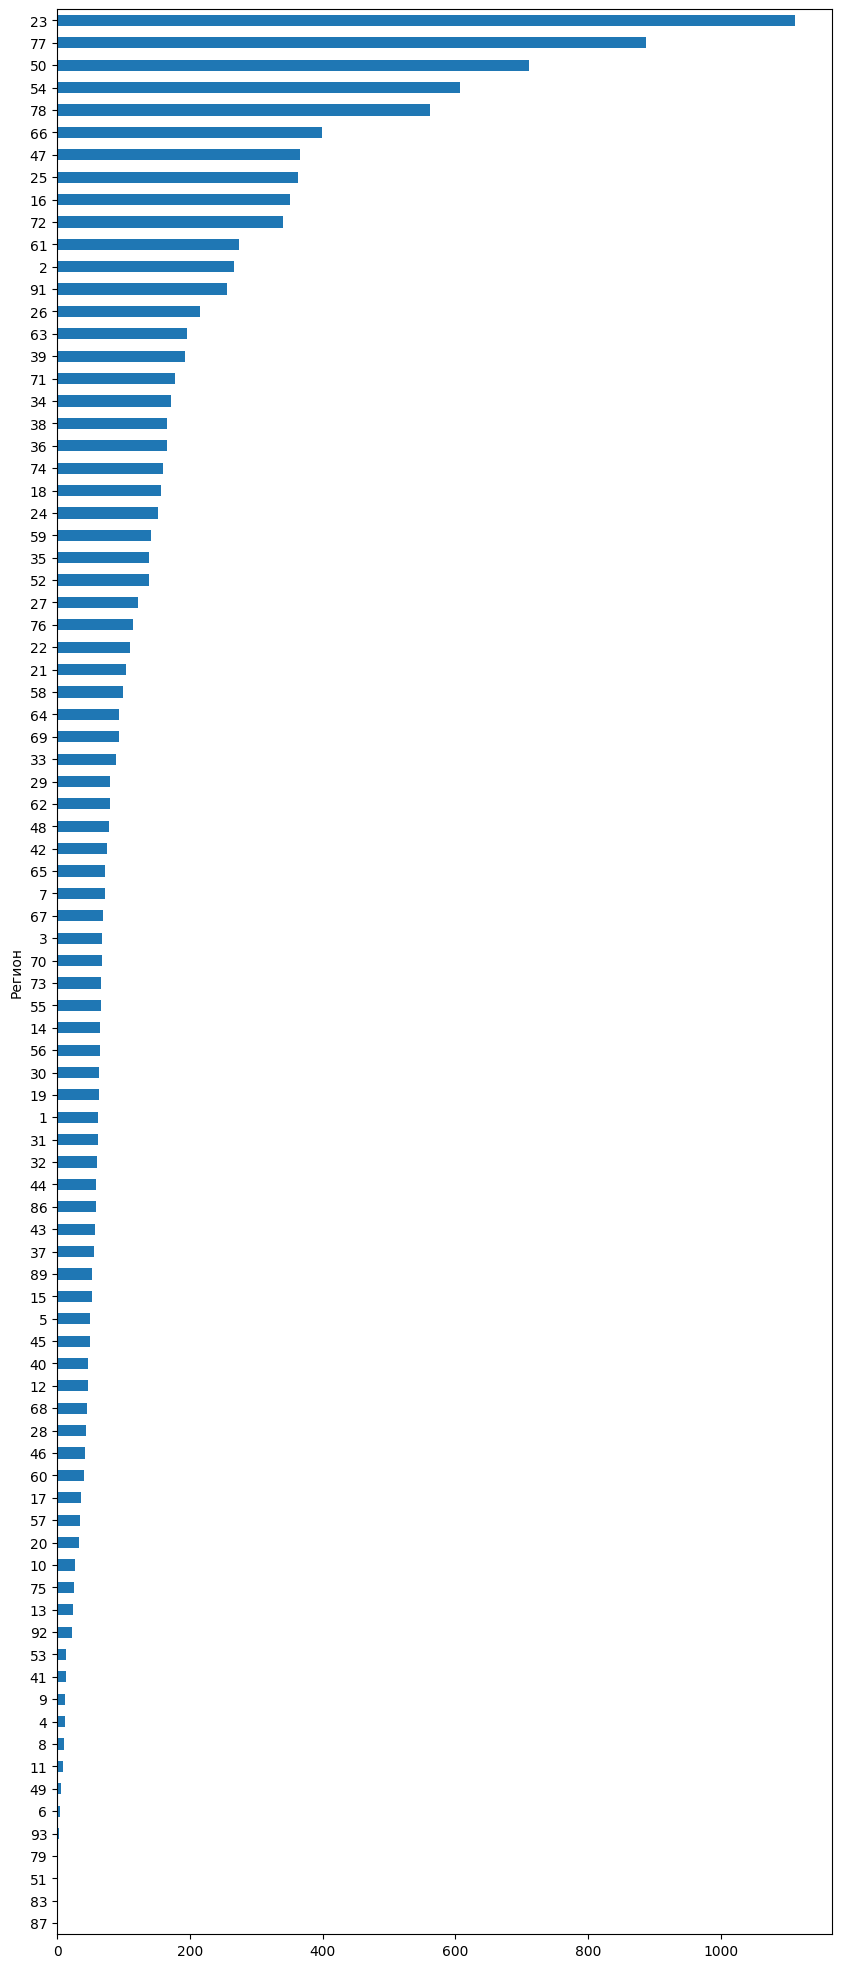

In [15]:
data_vis.volume_housing_region()

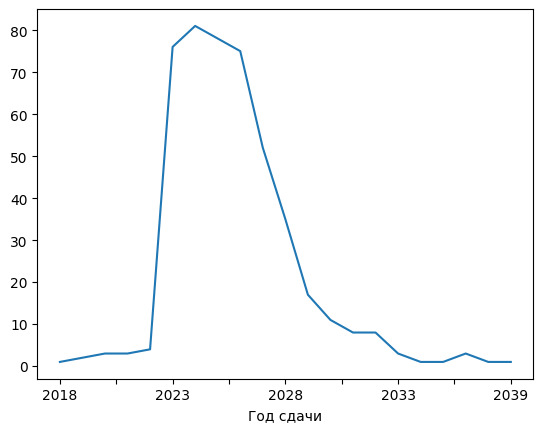

In [16]:
data_vis.volume_year_plot()

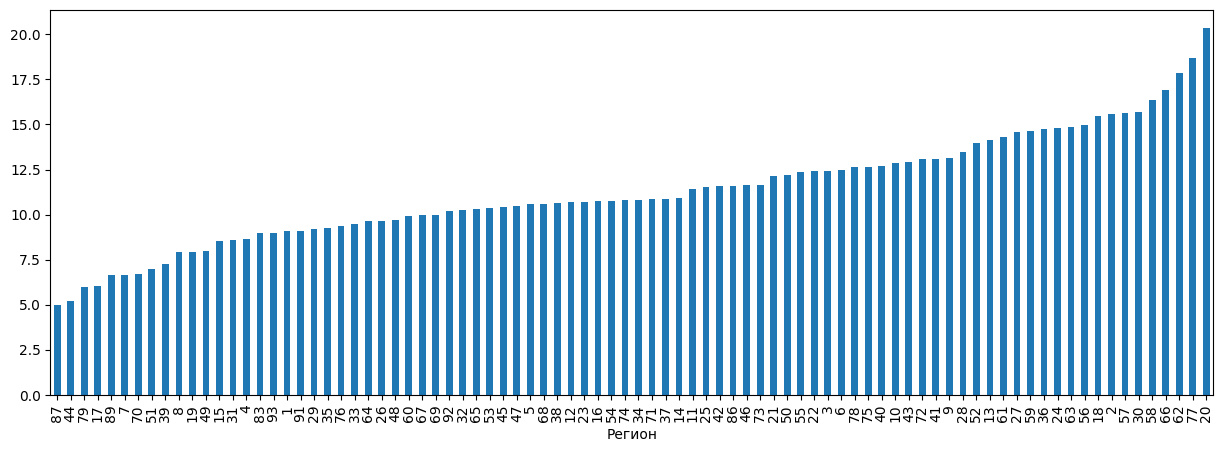

In [17]:
data_vis.mean_max_floors()